In [103]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import sklearn
from sklearn import preprocessing
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [40]:
final_data = pd.read_csv('data/final_data.csv')

In [41]:
# Remove unnecessary columns
final_data = final_data.drop(['Unnamed: 0'], axis=1)

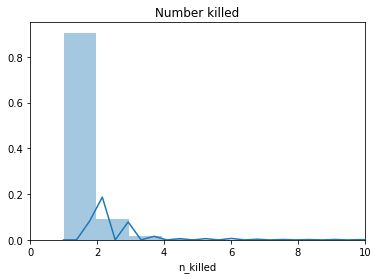

In [87]:
# Distribution plot of n_killed
# We will log this!!!!!!!!
sns.distplot(final_data['n_killed'], kde=True)
plt.xlim(0,10)
plt.title('Number killed');

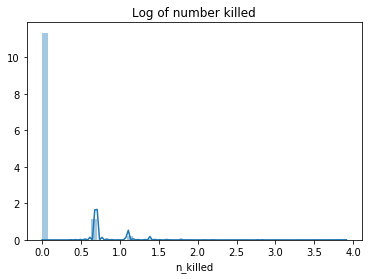

In [99]:
sns.distplot(np.log(final_data['n_killed']), kde=True)
plt.title('Log of number killed');

In [43]:
final_data['n_killed'].value_counts()

1     7605
2      758
3      151
4       31
6        7
5        6
9        2
8        2
27       1
50       1
10       1
17       1
16       1
Name: n_killed, dtype: int64

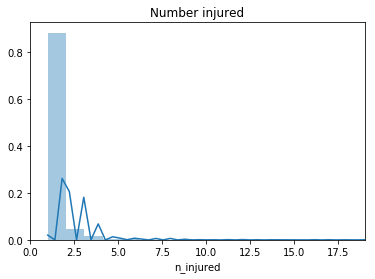

In [86]:
# Distribution plot of n_injured
# we will log this!!!!!!!!!!!!
sns.distplot(final_data['n_injured'], kde=True)
plt.xlim(0, 19)
plt.title('Number injured');

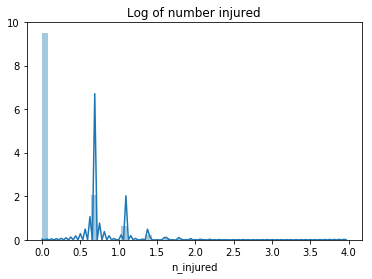

In [98]:
sns.distplot(np.log(final_data['n_injured']), kde=True)
plt.title('Log of number injured');

In [45]:
final_data['n_injured'].value_counts()

1     6466
2     1398
3      419
4      149
5       52
6       34
7       13
8       10
9        6
10       3
11       3
14       3
19       2
12       2
16       2
18       1
20       1
17       1
53       1
15       1
Name: n_injured, dtype: int64

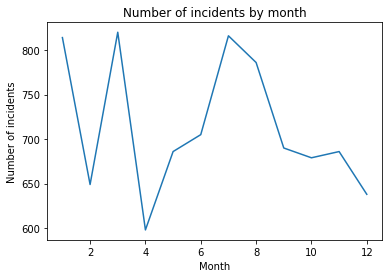

In [57]:
# Gun violence by month
v1_groups = final_data.groupby(final_data['month']).count().iloc[:, 0]
v1 = plt.plot(v1_groups)
plt.title('Number of incidents by month')
plt.xlabel('Month')
plt.ylabel('Number of incidents');

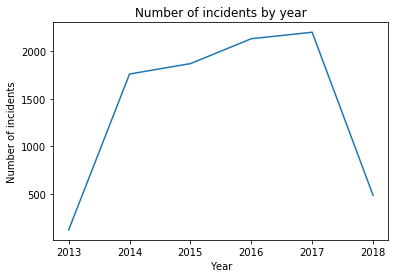

In [88]:
# Gun violence by year
# Year + month, etc., segment it more
v2_groups = final_data.groupby(final_data['year']).count().iloc[:, 0]
v2 = plt.plot(v2_groups)
plt.title('Number of incidents by year')
plt.xlabel('Year')
plt.ylabel('Number of incidents');

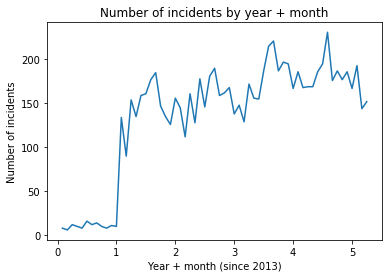

In [118]:
# Time Number is a number that represents the point in time in a scaled way
# Year + Month/12 - 2013 (start of our data)

final_data['time number normed'] = (final_data['year'] + final_data['month']/12) - 2013

time_normed_groups = final_data.groupby(final_data['time number normed']).count().iloc[:, 0]
time_normed = plt.plot(time_normed_groups)
plt.title('Number of incidents by year + month')
plt.xlabel('Year + month (since 2013)')
plt.ylabel('Number of incidents');

In [71]:
final_data['city_or_county'].value_counts().to_csv('location_counts')

In [72]:
final_data.columns

Index(['incident_id', 'year', 'month', 'day', 'state', 'city_or_county',
       'address', 'n_killed', 'n_injured', 'congressional_district',
       'gun_stolen', 'gun_type', 'incident_characteristics', 'latitude',
       'longitude', 'n_guns_involved', 'participant_age', 'participant_gender',
       'participant_name', 'participant_relationship', 'participant_status',
       'participant_type', 'state_house_district', 'state_senate_district',
       'n_people', 'n_young', 'n_mid', 'n_old', 'n_female', 'n_male',
       'n_unknown_gender', 'n_unknown_age', 'State_x', 'State_x.1',
       'Mental_Health_Records_Submitted_2008',
       'Mental_Health_Records_Submitted_2017', 'Gun_Sale_Denials_2008',
       'Gun_Sale_Denials_2017', 'State_y', 'State_y.1',
       'Giffords_Gun_Safety_Grade', 'Gun_Death_Rate_2018 (per 100k people)',
       'Gun_Death_Rank', 'Rank', 'State_x.2', 'State_x.3',
       '# of guns per capita', '# of guns registered', 'State_y.2',
       'State_y.3', 'Permit Type', 

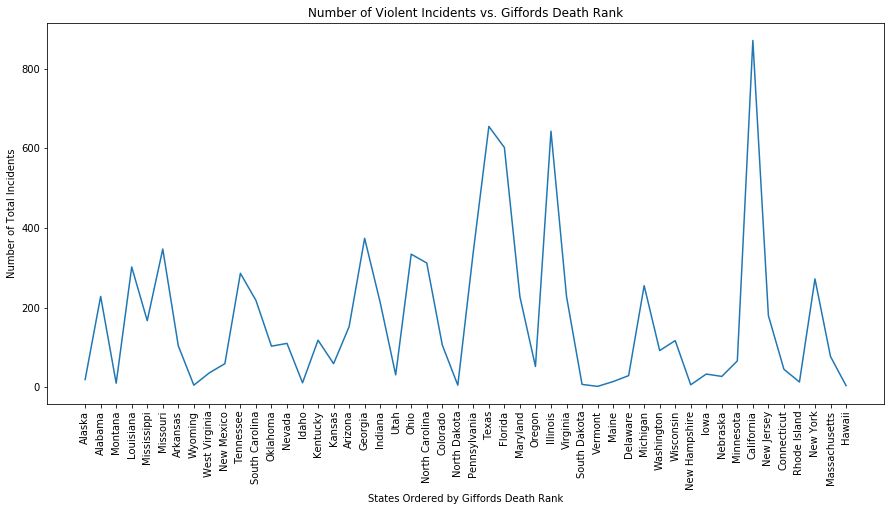

In [147]:
gun_death_sort = final_data.sort_values(by='Gun_Death_Rank', ascending=True)
v3_groups = pd.DataFrame(gun_death_sort.groupby(gun_death_sort['state']).count().iloc[:, 0])
gun_safety = pd.read_csv('data/GiffordsData.csv')
merged = v3_groups.merge(gun_safety, left_on='state', right_on='State').sort_values('Gun_Death_Rank').set_index('State')
ordered = pd.DataFrame(merged['incident_id'])

plt.figure(figsize=(15, 7))
v3 = plt.plot(ordered)
plt.title('Number of Violent Incidents vs. Giffords Death Rank')
plt.xlabel('States Ordered by Giffords Death Rank')
plt.ylabel('Number of Total Incidents')
plt.xticks(rotation=90);